In [61]:
#import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import seaborn as sns

In [62]:
#read csv file
df=pd.read_csv('/Users/saaijeeshsn/Library/CloudStorage/OneDrive-UCB-O365/ML/cleaned_data1.csv')
df.head(5)

,date,month,customer_code,product_code,division,segment,category,product,variant,customer,market,platform,channel,sub_zone,region,quantity,manufacturing_cost,freight_cost,net_sales_amount,holiday_count
0,2018-09-01,September,90023030,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NaN,NaN,16,85.4272,4.0503,163.98,0
1,2018-09-01,September,90010046,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Bangladesh,E-Commerce,Retailer,ROA,APAC,3,16.0176,0.7408,24.53,0
2,2018-09-01,September,90023023,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NaN,NaN,31,165.5152,7.6096,308.08,0
3,2018-09-01,September,90012041,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Germany,E-Commerce,Retailer,NE,EU,18,96.1056,4.5517,155.88,0
4,2018-09-01,September,90014141,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Netherlands,E-Commerce,Retailer,NE,EU,2,10.6784,0.5055,18.12,0


In [63]:
#filter the data
filtered_data = df.groupby(['month','product', 'variant','market','platform', 'channel']).agg({
    'quantity': 'sum'
}).reset_index()

filtered_data.head()


,month,product,variant,market,platform,channel,quantity
0,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Australia,Brick & Mortar,Retailer,167
1,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Australia,E-Commerce,Direct,61
2,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Australia,E-Commerce,Retailer,63
3,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Austria,Brick & Mortar,Retailer,15
4,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Austria,E-Commerce,Direct,10


In [64]:
#find its shape
filtered_data.shape

(215453, 7)

In [65]:
filtered_data.head()

,month,product,variant,market,platform,channel,quantity
0,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Australia,Brick & Mortar,Retailer,167
1,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Australia,E-Commerce,Direct,61
2,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Australia,E-Commerce,Retailer,63
3,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Austria,Brick & Mortar,Retailer,15
4,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Austria,E-Commerce,Direct,10


In [66]:
#one hot encoding for categorical columns
filtered_data = pd.get_dummies(filtered_data, columns=['product', 'variant', 'market', 'platform', 'channel'], prefix=None, dtype=int)
filtered_data.columns = filtered_data.columns.str.split('_').str[-1]

filtered_data.head()

,month,quantity,AQ 5000 Series Electron 8 5900X Desktop Processor,AQ 5000 Series Electron 9 5900X Desktop Processor,AQ 5000 Series Ultron 8 5900X Desktop Processor,AQ Aspiron,AQ Clx1,AQ Clx2,AQ Clx3,AQ Digit,...,South Korea,Spain,Sweden,USA,United Kingdom,Brick & Mortar,E-Commerce,Direct,Distributor,Retailer
0,April,167,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,April,61,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,April,63,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,April,15,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,April,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [67]:
#label encoding for ordinal values
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()



In [68]:
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Apply the mapping to the 'month' column
filtered_data['month_numeric'] = filtered_data['month'].map(month_mapping)

In [69]:
filtered_data=filtered_data.drop(columns='month')

In [70]:
filtered_data.head(5)

,quantity,AQ 5000 Series Electron 8 5900X Desktop Processor,AQ 5000 Series Electron 9 5900X Desktop Processor,AQ 5000 Series Ultron 8 5900X Desktop Processor,AQ Aspiron,AQ Clx1,AQ Clx2,AQ Clx3,AQ Digit,AQ Digit SSD,...,Spain,Sweden,USA,United Kingdom,Brick & Mortar,E-Commerce,Direct,Distributor,Retailer,month_numeric
0,167,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,4
1,61,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,4
2,63,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,4
3,15,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,4
4,10,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,4


In [71]:
# Define a function to categorize the quantity
def categorize_sales(quantity):
    if quantity <= 250:
        return "Low sales"
    elif 250 < quantity <= 1000:
        return "Medium sales"
    else:
        return "High sales"

# Apply the categorization function to create a new column 'sales_range'
filtered_data['sales_range'] = filtered_data['quantity'].apply(categorize_sales)

In [72]:
#drop the columns
filtered_data.drop(columns='quantity',inplace=True)

In [73]:
filtered_data.head()

,AQ 5000 Series Electron 8 5900X Desktop Processor,AQ 5000 Series Electron 9 5900X Desktop Processor,AQ 5000 Series Ultron 8 5900X Desktop Processor,AQ Aspiron,AQ Clx1,AQ Clx2,AQ Clx3,AQ Digit,AQ Digit SSD,AQ Dracula HDD  3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,...,Sweden,USA,United Kingdom,Brick & Mortar,E-Commerce,Direct,Distributor,Retailer,month_numeric,sales_range
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,4,Low sales
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,4,Low sales
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,4,Low sales
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,4,Low sales
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,4,Low sales


In [74]:
#label encoding for quantity
filtered_data['sales_range'] = Le.fit_transform(filtered_data['sales_range'])

## Class imbalance

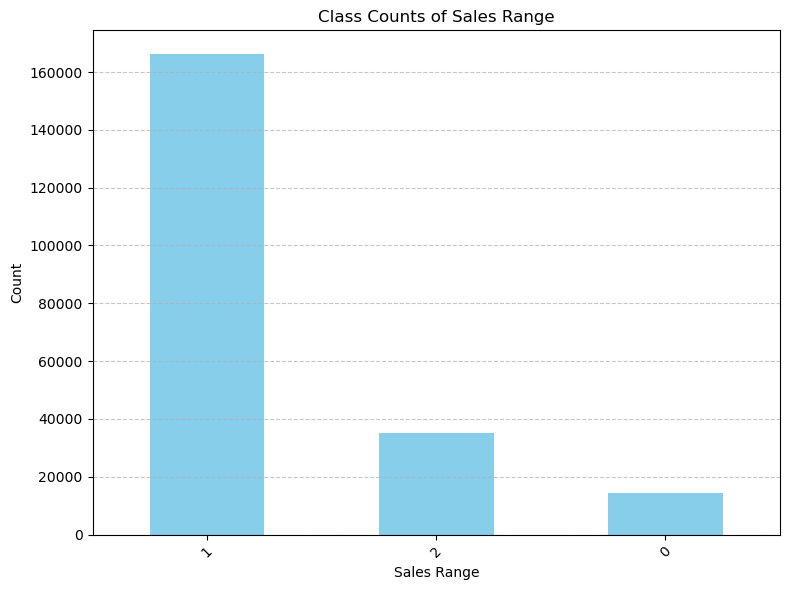

In [75]:
class_counts = filtered_data['sales_range'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Counts of Sales Range')
plt.xlabel('Sales Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [77]:
filtered_data.to_csv('/Users/saaijeeshsn/Library/CloudStorage/OneDrive-UCB-O365/ML/Neural_networks_prep_data.csv')

## Feed-Forward Neural network with Imbalanced Dataset

In [78]:
#Separate  X and Y
X_1 = filtered_data.drop("sales_range", axis = 1)
y_1 = filtered_data['sales_range']

In [79]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

#number of classes
num_classes = 3  
num_features = X_train_1.shape[1]

#neural networks model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(num_features,)),  #input layer with 64 neurons
    layers.Dense(64, activation='relu'), #hidden layer with 64 neurons
    layers.Dense(64, activation='relu'), #hidden layer with 64 neurons
    layers.Dense(num_classes, activation='softmax')  #output layer
])

#compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#train the model
history = model.fit(X_train_1, y_train_1, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


/Users/saaijeeshsn/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4310/4310 ━━━━━━━━━━━━━━━━━━━━ 2s 346us/step - accuracy: 0.8803 - loss: 0.2866 - val_accuracy: 0.9281 - val_loss: 0.1667
Epoch 2/50
4310/4310 ━━━━━━━━━━━━━━━━━━━━ 1s 334us/step - accuracy: 0.9245 - loss: 0.1705 - val_accuracy: 0.9289 - val_loss: 0.1602
Epoch 3/50
4310/4310 ━━━━━━━━━━━━━━━━━━━━ 1s 335us/step - accuracy: 0.9267 - loss: 0.1618 - val_accuracy: 0.9304 - val_loss: 0.1536
Epoch 4/50
4310/4310 ━━━━━━━━━━━━━━━━━━━━ 1s 326us/step - accuracy: 0.9302 - loss: 0.1552 - val_accuracy: 0.9338 - val_loss: 0.1530
Epoch 5/50
4310/4310 ━━━━━━━━━━━━━━━━━━━━ 1s 330us/step - accuracy: 0.9332 - loss: 0.1499 - val_accuracy: 0.9328 - val_loss: 0.1484
Epoch 6/50
4310/4310 ━━━━━━━━━━━━━━━━━━━━ 1s 334us/step - accuracy: 0.9332 - loss: 0.1481 - val_accuracy: 0.9304 - val_loss: 0.1536
Epoch 7/50
4310/4310 ━━━━━━━━━━━━━━━━━━━━ 1s 333us/step - accuracy: 0.9334 - loss: 0.1445 - val_accuracy: 0.9281 - val_loss: 0.1587
Epoch 8/50
4310/4310 ━━━━━━━━━━━━━━━━━━━━ 1s 334us/step - accuracy: 0.9338 - loss: 0.14

In [80]:
y_pred = model.predict(X_test_1)

#convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

#compute accuracy
accuracy = accuracy_score(y_test_1, y_pred_classes)

#compute precision
precision = precision_score(y_test_1, y_pred_classes, average='weighted')

#compute recall
recall = recall_score(y_test_1, y_pred_classes, average='weighted')

#compute F1 score
f1 = f1_score(y_test_1, y_pred_classes, average='weighted')

#generate classification report
class_report = classification_report(y_test_1, y_pred_classes)

#create confusion matrix
conf_matrix = confusion_matrix(y_test_1, y_pred_classes)

1347/1347 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step


In [81]:
#display the results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1,'\n')
print('Classification Report:\n', class_report)

Accuracy: 0.9268524749947785
Precision: 0.927784734427196
Recall: 0.9268524749947785
F1 Score: 0.9272398777304919 

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.86      2840
           1       0.97      0.96      0.96     33148
           2       0.77      0.80      0.78      7103

    accuracy                           0.93     43091
   macro avg       0.87      0.86      0.87     43091
weighted avg       0.93      0.93      0.93     43091



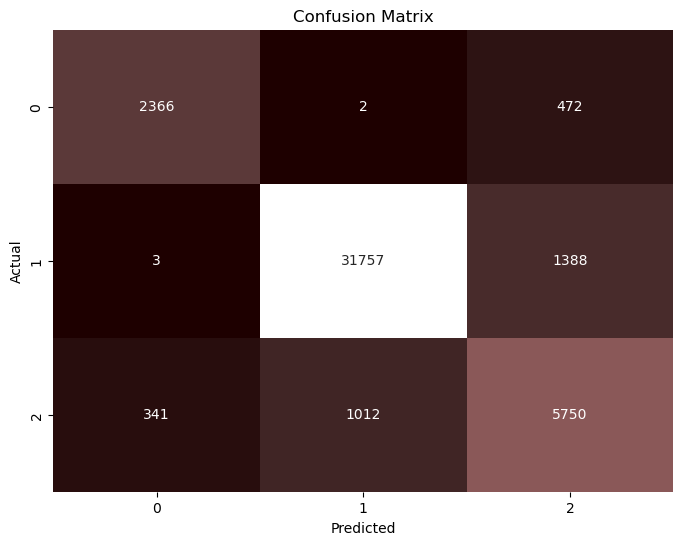

In [54]:
#plot the confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='pink', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Handling class imbalance (Perform Undersampling)

In [55]:
#sample of low sales
df_0 = filtered_data[filtered_data['sales_range'] == 1].sample(n=14354, random_state=42)

#sample of medium sales
df_1 = filtered_data[filtered_data['sales_range'] == 0].sample(n=14354, random_state=42)

#sample of high sales
df_2 = filtered_data[filtered_data['sales_range'] == 2].sample(n=14354, random_state=42)

#combine the samples
df_sampled = pd.concat([df_0, df_1,df_2])

#shuffle the samples
df_sampled = df_sampled.sample(frac=1, random_state=42).reset_index(drop=True)

#find its shape
print(df_sampled.shape)

(43062, 115)


In [56]:
df_sampled.head()

,AQ 5000 Series Electron 8 5900X Desktop Processor,AQ 5000 Series Electron 9 5900X Desktop Processor,AQ 5000 Series Ultron 8 5900X Desktop Processor,AQ Aspiron,AQ Clx1,AQ Clx2,AQ Clx3,AQ Digit,AQ Digit SSD,AQ Dracula HDD  3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,...,Sweden,USA,United Kingdom,Brick & Mortar,E-Commerce,Direct,Distributor,Retailer,month_numeric,sales_range
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,5,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,3,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,3,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,4,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,11,2


In [57]:
df_sampled.to_csv('/Users/saaijeeshsn/Library/CloudStorage/OneDrive-UCB-O365/ML/Neural_networks_prep_data_sampled.csv')

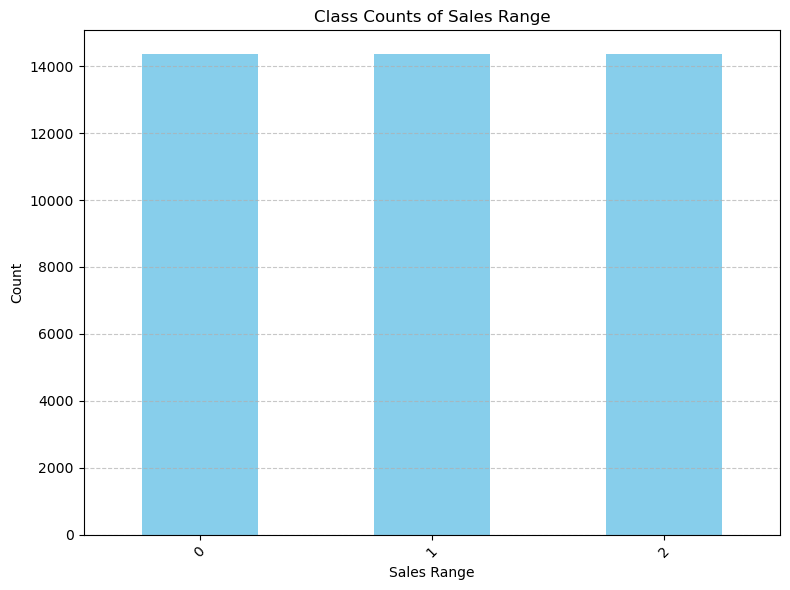

In [58]:
class_counts_1 = df_sampled['sales_range'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
class_counts_1.plot(kind='bar', color='skyblue')
plt.title('Class Counts of Sales Range')
plt.xlabel('Sales Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Feed-Forward Neural network with Balanced Dataset

In [27]:
#Separate  X and Y
X = df_sampled.drop("sales_range", axis = 1)
y = df_sampled['sales_range']


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#number of classes
num_classes = 3  
num_features = X_train.shape[1]

#neural networks model
model_1 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(num_features,)),  #input layer with 64 neurons
    layers.Dense(64, activation='relu'), #hidden layer with 64 neurons
    layers.Dense(64, activation='relu'), #hidden layer with 64 neurons
    layers.Dense(num_classes, activation='softmax')  #output layer
])

#compile the model
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#train the model
history = model_1.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


/Users/saaijeeshsn/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 396us/step - accuracy: 0.6971 - loss: 0.6385 - val_accuracy: 0.8792 - val_loss: 0.2780
Epoch 2/50
862/862 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.8831 - loss: 0.2822 - val_accuracy: 0.8853 - val_loss: 0.2703
Epoch 3/50
862/862 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - accuracy: 0.8911 - loss: 0.2581 - val_accuracy: 0.8872 - val_loss: 0.2615
Epoch 4/50
862/862 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - accuracy: 0.8982 - loss: 0.2446 - val_accuracy: 0.8972 - val_loss: 0.2438
Epoch 5/50
862/862 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - accuracy: 0.9042 - loss: 0.2282 - val_accuracy: 0.8898 - val_loss: 0.2562
Epoch 6/50
862/862 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - accuracy: 0.9046 - loss: 0.2284 - val_accuracy: 0.8955 - val_loss: 0.2498
Epoch 7/50
862/862 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - accuracy: 0.9126 - loss: 0.2115 - val_accuracy: 0.8974 - val_loss: 0.2442
Epoch 8/50
862/862 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - accuracy: 0.9130 - loss: 0.2080 - val_accurac

In [30]:
y_pred_2 = model_1.predict(X_test)

#convert predicted probabilities to class labels
y_pred_classes_2 = np.argmax(y_pred_2, axis=1)

#compute accuracy
accuracy_2 = accuracy_score(y_test, y_pred_classes_2)

#compute precision
precision_2 = precision_score(y_test, y_pred_classes_2, average='weighted')

#compute recall
recall_2 = recall_score(y_test, y_pred_classes_2, average='weighted')

#compute F1 score
f1_2 = f1_score(y_test, y_pred_classes_2, average='weighted')

#generate classification report
class_report_2 = classification_report(y_test, y_pred_classes_2)

#create confusion matrix
conf_matrix_2 = confusion_matrix(y_test, y_pred_classes_2)

270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step


In [31]:
#display the results
print('Accuracy:', accuracy_2)
print('Precision:', precision_2)
print('Recall:', recall_2)
print('F1 Score:', f1_2,'\n')
print('Classification Report:\n', class_report_2)

Accuracy: 0.8861024033437827
Precision: 0.8860911259774726
Recall: 0.8861024033437827
F1 Score: 0.8854676720530401 

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      2890
           1       0.94      0.91      0.92      2885
           2       0.85      0.80      0.82      2838

    accuracy                           0.89      8613
   macro avg       0.89      0.89      0.89      8613
weighted avg       0.89      0.89      0.89      8613



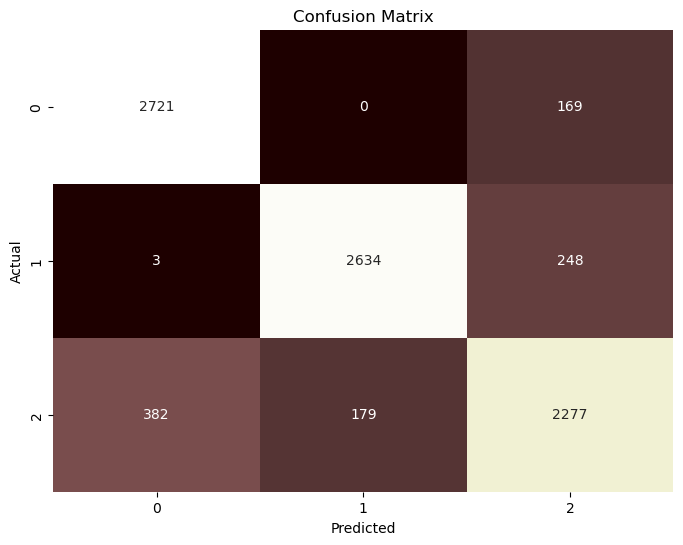

In [32]:
#plot the confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_2, annot=True, cmap='pink', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()